# **Building and Training a Feedforward Neural Network for Language Modeling**

Estimated time needed: **60** minutes

This project explores the use of Feedforward Neural Networks (FNNs) in language modeling. The primary objective is to build a neural network that learns word relationships and generates meaningful text sequences. The implementation is done using PyTorch, covering key aspects of Natural Language Processing (NLP), such as:
* Tokenization & Indexing: Converting text into numerical representations.
* Embedding Layers: Mapping words to dense vector representations for efficient learning.
* Context-Target Pair Generation (N-grams): Structuring training data for sequence prediction.
* Multi-Class Neural Network: Designing a model to predict the next word in a sequence.

The training process includes optimizing the model with loss functions and backpropagation techniques to improve accuracy and coherence in text generation. By the end of the project, you will have a working FNN-based language model capable of generating text sequences.
<div style="text-align:center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0WSVEN/song%20%281%29.png" alt="Image Description">
</div>


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-required-libraries">Installing required libraries</a></li>
            <li><a href="#Importing-required-libraries">Importing required libraries</a></li>
            <li><a href="#Defining-helper-functions">Defining helper functions</a></li>
        </ol>
    </li>
    <li>
       <a href="#Feedforward-Neural-Networks-(FNNs)-for-language-models">Feedforward Neural Networks (FNNs) for language models</a></li>
        <ol>
            <li><a href="#Tokenization-for-FNN">Tokenization for FNN</a></li>
            <li><a href="#Indexing">Indexing</a></li>
            <li><a href="#Embedding-layers">Embedding layers</a></li>
        </ol>
</li>
    <li><a href="#Generating-context-target-pairs-(n-grams)">Generating context-target pairs (n-grams)</a></li>
    <ol>
        <li><a href="#Batch-function">Batch function</a></li>
        <li><a href="#Multi-class-neural-network">Multi-class neural network</a></li>
    </ol>
    <li><a href="#Training">Training</a></li>
    </li>
    <li><a href="#Exercises">Exercises</a></li>
    </li>
</ol>


# Objectives

After completing this lab, you will be able to:

 - Implement a feedforward neural network using the PyTorch framework, including embedding layers, for language modeling tasks.
 - Fine-tune the output layer of the neural network for optimal performance in text generation.
 - Apply various training strategies and fundamental Natural Language Processing (NLP) techniques, such as tokenization and sequence analysis, to improve text generation.


# Setup


For this lab, you will use the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing required libraries

All the required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries using the code cell below.

<h2 style="color:red;">After installing the libraries below please RESTART THE KERNEL and run all cells.</h2>


In [4]:
%%capture
!pip install nltk
!pip install matplotlib
!pip install scikit-learn
!pip install torch=2.6.0
!pip install torchtext==0.17.2
!pip install pandas
!pip install numpy==1.26.4

In [1]:
%%capture
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')
import time
from collections import OrderedDict

import re

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import string
import time

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


## Feedforward Neural Networks (FNNs) for language models

FNNs, or Multi-Layer Perceptrons, serve as the foundational components for comprehending neural networks in natural language processing (NLP). In NLP tasks, FNNs process textual data by transforming it into numerical vectors known as embeddings. Subsequently, these embeddings are input to the network to predict language facets, such as the upcoming word in a sentence or the sentiment of a text.

Let's consider the following song lyrics for our analysis.


In [2]:
song= """We are no strangers to love
You know the rules and so do I
A full commitments what Im thinking of
You wouldnt get this from any other guy
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
And if you ask me how Im feeling
Dont tell me youre too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you"""

 ### Tokenization for FNN


 This PyTorch function is used to obtain a tokenizer for text.


In [3]:
tokenizer = get_tokenizer('basic_english')
tokens = tokenizer(song)
print(tokens[0:10])

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']


In [4]:
def preprocess_String(s):
  """
  Preprocesses a given string by performing the following steps:

  1. Removes all non-word characters (excluding letters and numbers).
  2. Removes all whitespace characters.
  3. Removes all numeric digits.

  Parameters:
  s (str): The input string to be cleaned.

  Returns:
  str: The processed string with only alphabetic characters, no spaces, and no digits.
  """
  # Remove all non-word characters (everything except letters and numbers)
  # \w matches any word character (letters, numbers, and underscores)
  # \s matches any whitespace characters
  # ^ inside [] negates the selection, so [^\w\s] matches anything that's NOT a word character or whitespace.

  s = re.sub(r"^\w\s", '', s)

  # Remove all whitespace characters (spaces, tabs, newlines)
  # \s+ matches one or more whitespace characters.
  s = re.sub(r"\s+", '', s)

  # Remove all digits (0-9)
  # \d matches any digit character.
  s = re.sub(r"\d", '', s)

  return s

In [5]:
def preprocess(words):
  """
  Preprocesses a given text by tokenizing it, cleaning individual words, and
  converting them to lowercase while removing empty or punctuation tokens.

  Steps:
  1. Tokenization: Splits the input text into individual word tokens.
  2. Cleaning: Applies `preprocess_string()` to remove non-word characters,
      spaces, and digits from each token.
  3. Normalization: Converts all tokens to lowercase.
  4. Filtering: Removes empty strings and punctuation tokens.

  Parameters:
  words (str): The input text to be tokenized and preprocessed.

  Returns:
  list: A list of cleaned, lowercase tokens.
  """

  # Tokenize the input text into words
  tokens = tokenizer(words)

  # Apply preprocessing to each token (removes unwanted characters)
  tokens = [preprocess_String(w) for w in tokens]

  # Convert tokens to lowercase and remove empty strings or punctuation
  return [w.lower() for w in tokens if len(w)!=0 and w not in string.punctuation]

# Example usage:
tokens = preprocess(song)
print(tokens[0:10])

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']


### Indexing

TorchText provides tools to tokenize text into individual words (tokens) and build a vocabulary, which maps tokens to unique integer indexes. This is a crucial step in preparing text data for  machine learning models that require numerical input.


In [6]:
def tokenizetext(song):
  """
  Tokenizes the input text (song) and builds a vocabulary from the tokens.

  Steps:
  1. Tokenization: The function splits the input text into words and applies
      a tokenizer function to each word.
  2. Vocabulary Building: Constructs a vocabulary from the tokenized words,
      including a special "<unk>" token to handle out-of-vocabulary words.
  3. Default Indexing: Sets the default index for unknown words, ensuring
      that any unseen tokens are mapped to "<unk>".

  Parameters:
  song (str): The input text (song lyrics) to be tokenized and processed.

  Returns:
  vocab (Vocab): A vocabulary object mapping tokens to their corresponding indices.
  """

  # Tokenize the text
  # Split the input text into words and apply the tokenizer function to each word.
  # The 'map' function ensures that each word is tokenized properly.
  tokenized_song = map(tokenizer, song.split())

  # Build vocabulary from tokenized text
  # The function `build_vocab_from_iterator` constructs a vocabulary by iterating
  # over the tokenized words. The special token "<unk>" is added to handle words
  # that are not present in the vocabulary.
  vocab = build_vocab_from_iterator(tokenized_song, specials=["<unk>"])

  # Set the default index for unknown words
  # The default index is set to the index of "<unk>" so that any word not found
  # in the vocabulary is mapped to this token, preventing errors during lookup.
  vocab.set_default_index(vocab["<unk>"])

  return vocab

In [7]:
# Convert the tokens to indices by applying the function as shown here:
vocab = tokenizetext(song)

In [8]:
vocab(tokens[0:10])

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]

In [9]:
tokens[0:10]

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']

In [10]:
# Write a text function that converts raw text into indexes.
text_pipeline = lambda x:vocab(tokenizer(x))
text_pipeline(song)[0:10]

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]


Find the word corresponding to an index using the```get_itos()```method. The result is a list where the index of the list corresponds to a word.


In [11]:
index_to_tokens = vocab.get_itos()
print(index_to_tokens[21], index_to_tokens[58], index_to_tokens[70], index_to_tokens[74], index_to_tokens[25], index_to_tokens[69], index_to_tokens[2], index_to_tokens[20], index_to_tokens[31], index_to_tokens[72])

we are no strangers to love you know the rules


## Embedding layers

An embedding layer is a crucial element in natural language processing (NLP) and neural networks designed for sequential data. It serves to convert categorical variables, like words or discrete indexes representing tokens, into continuous vectors. This transformation facilitates training and enables the network to learn meaningful relationships among words.

Let's consider a simple example involving a vocabulary of words
- **Vocabulary**: {apple, banana, orange, pear}

Each word in your vocabulary has a unique index assigned to it:
- **Indices**: {0, 1, 2, 3}

When using an embedding layer, you will initialize random continuous vectors for each index. For instance, the embedding vectors might look like:

- Vector for index 0 (apple): [0.2, 0.8]
- Vector for index 1 (banana): [0.6, -0.5]
- Vector for index 2 (orange): [-0.3, 0.7]
- Vector for index 3 (pear): [0.1, 0.4]
In PyTorch, you can create an embedding layer.


In [12]:
def genembedding(vocab):
  """
  Generates an embedding layer for the given vocabulary.

  The embedding layer transforms words into dense vector representations,
  allowing the model to learn semantic relationships between words.

  Parameters:
  vocab (Vocab): The vocabulary object containing unique words and their indices.

  Returns:
  nn.Embedding: A PyTorch embedding layer with a specified embedding dimension.
  """

  # Define the embedding dimension (size of word vectors)
  embedding_dim = 20 # Each word will be represented as a 20-dimensional vector

  # Get the vocabulary size (number of unique words in the vocabulary)
  vocab_size = len(vocab)

  # Create an embedding layer
  # The nn.Embedding module maps word indices to dense vector representations.
  # It takes vocab_size as the number of words and embedding_dim as the vector size.

  embeddings = nn.Embedding(vocab_size, embedding_dim)

  return embeddings

**Embeddings**: Obtain the embedding for the first word with index 0 or 1. Don't forget that you have to convert the input into a tensor. The embeddings are initially initialized randomly, but as the model undergoes training, words with similar meanings gradually come to cluster closer together


In [13]:
embeddings = genembedding(vocab)

for n in range(2):
  embedding = embeddings(torch.tensor(n))
  print("word", index_to_tokens[n])
  print("index", n)
  print("embedding", embedding)
  print("embedding shape", embedding.shape)

word <unk>
index 0
embedding tensor([-2.0152,  0.9130, -0.0496,  0.9264, -1.6486,  0.8336,  0.5609, -1.6710,
        -0.1493,  0.2783,  0.6443, -0.3805,  1.0979, -0.1834, -0.9932, -0.4154,
         0.0852, -0.7373, -1.3552, -1.0474], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])
word gonna
index 1
embedding tensor([-1.4295, -0.3222,  1.6974,  0.5041, -0.8005,  1.0850, -0.6344,  1.7520,
        -0.4867, -0.4837,  0.5226, -0.0723, -0.3394, -0.4246,  0.3093, -0.0748,
         0.7390,  1.9145, -1.1775, -0.2011], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])


These vectors will serve as inputs for the next layer.


### Generating context-target pairs (n-grams)

Organize words within a variable-size context using the following approach: Each word is denoted by 'i'.
To establish the context, simply subtract 'j'. The size of the context is determined by the value of``CONTEXT_SIZE``.


In [14]:
# Define the context size for generating n-grams
CONTEXT_SIZE=2 # The number of previous words used to predict the next word

def genngrams(tokens):
  """
  Generates n-grams from a list of tokens, where each n-gram consists of a
  context (previous words) and a target (next word).

  The function constructs a list of tuples where:
  - The first element is a list of `CONTEXT_SIZE` previous words.
  - The second element is the target word that follows the context.

  Parameters:
  tokens (list): A list of preprocessed word tokens.

  Returns:
  list: A list of tuples representing n-grams.
        Each tuple contains (context_words, target_word).
  """
  # Generate n-grams
  # Iterate through the tokens starting from index CONTEXT_SIZE to the end
  # For each token at position 'i', extract the previous CONTEXT_SIZE words as context

  ngrams =[
      (
          [tokens[i-j-1] for j in range(CONTEXT_SIZE)],
          tokens[i]
      )
      for i in range(CONTEXT_SIZE, len(tokens))
  ]

  return ngrams

In [15]:
ngrams=genngrams(tokens)
context, target = ngrams[0]
print("Context: ", context, " target: ", target)
print("Context Index: ", vocab(context), "target Index: ", vocab([target]))

Context:  ['are', 'we']  target:  no
Context Index:  [58, 21] target Index:  [70]


In this context, there are multiple words. Aggregate the embeddings of each of these words and then adjust the input size of the subsequent layer accordingly. Then, create the next layer.

In [16]:
embedding_dim=20
linear = nn.Linear(embedding_dim*CONTEXT_SIZE, 128)


You have the two embeddings.


In [17]:
embeddings = genembedding(vocab)
my_embedding = embeddings(torch.tensor(vocab(context)))
my_embedding.shape

torch.Size([2, 20])

Reshape the embeddings.


In [18]:
my_embedding = my_embedding.reshape(1, -1)
my_embedding.shape

torch.Size([1, 40])

In [19]:
linear(my_embedding)

tensor([[-0.1902,  0.2665,  1.1187, -0.3738, -0.3141,  0.2283, -0.8851,  0.4659,
          0.5006,  0.4298, -0.2850, -0.5296, -0.6335,  0.5167,  0.0507,  0.2475,
         -0.7473, -0.3434, -0.3654, -0.6103, -0.8074,  0.0226, -0.5932,  0.0322,
          0.7257,  0.8736,  1.0424,  0.1743,  0.0766, -0.1891, -0.9996, -1.1044,
         -0.9709,  0.0490,  0.2844,  1.6269, -0.9233, -0.1355,  0.7202, -0.1053,
          0.1673, -1.0284,  0.7199,  0.0327, -0.0778, -0.1674,  0.4538, -0.3062,
          1.2677, -0.2359,  0.2515, -0.6796, -0.3665, -0.2612, -1.1505,  1.2774,
          0.2051,  0.0505,  0.1292,  0.7487, -1.1503,  0.8031,  0.8713,  0.8245,
         -0.2147,  0.2008, -0.4776, -0.1807,  0.7981,  0.1513, -0.0873, -0.8238,
         -0.5031,  0.9966, -0.1171,  0.5153,  0.0519, -0.1347, -0.0346,  0.0789,
          0.7378, -0.8835,  0.0375,  0.7789, -0.0999,  0.3132, -1.2221,  0.1186,
          0.4582,  0.7244,  0.9522, -0.1209,  0.4946,  0.1174,  0.3834, -0.0577,
          0.1121, -0.3604, -

## Batch function

Create a Batch function to interface with the data loader. Several adjustments are necessary to handle words that are part of a context in one batch and a predicted word in the following batch.


In [20]:
from torch.utils.data import DataLoader # Importing DataLoader for batch processing
import torch # Importing PyTorch

# Set the device to GPU if available; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
CONTEXT_SIZE=3 # Number of previous words used as context for prediction
BATCH_SIZE=10 # Number of samples per training batch
EMBEDDING_DIM=10 # Dimension of word embeddings

def collate_batch(batch):
  """
  Processes a batch of text data into input (context) and output (target) tensors
  for training a language model.

  The function extracts:
  - `context`: A list of word indices representing the context words for each target word.
  - `target`: A list of word indices representing the target word to predict.

  Parameters:
  batch (list): A list of tokenized words (strings).

  Returns:
  tuple: Two PyTorch tensors: (context_tensor, target_tensor)
          - context_tensor: Tensor of shape (batch_size - CONTEXT_SIZE, CONTEXT_SIZE),
            containing the word indices of context words.
          - target_tensor: Tensor of shape (batch_size - CONTEXT_SIZE,),
            containing the word indices of target words.
  """
  batch_size = len(batch) # Get the size of the batch
  context, target = [], [] # Initialize lists for context and target words

  # Loop through the batch, ensuring enough previous words exist for context
  for i in range(CONTEXT_SIZE, batch_size):
    # Convert the target word to its index using the vocabulary
    target.append(vocab([batch[i]]))

    # Convert the previous CONTEXT_SIZE words to indices using the vocabulary
    context.append(vocab([batch[i-j-1] for j in range(CONTEXT_SIZE)]))

  # Convert lists to PyTorch tensors and move them to the appropriate device (CPU/GPU)
  return torch.tensor(context).to(device), torch.tensor(target).to(device).reshape(-1)

Similarly, it's important to highlight that the size of the last batch could deviate from that of the earlier batches. To tackle this, the approach involves adjusting the final batch to conform to the specified batch size, ensuring it becomes a multiple of the predetermined size. When necessary, you'll employ padding techniques to achieve this harmonization. One approach you'll use is appending the beginning of the song to the end of the batch.


Let's break this down step by step and then look at a **brief example**.

---

### Code:

```python
padding = BATCH_SIZE - len(tokens) % BATCH_SIZE
tokens_pad = tokens + tokens[0:padding]
```

---

### ✅ What this does:

This code **adds padding tokens** to ensure that `tokens_pad` has a total length that is a **multiple of `BATCH_SIZE`**.
It does this by **repeating the start of the `tokens` list** to pad the end.

---

### Step-by-step explanation:

1. **`len(tokens) % BATCH_SIZE`**

   * Calculates how many leftover tokens there are when `tokens` is divided into batches.
   * Example: If you have 23 tokens and a batch size of 8, you get 2 full batches (16 tokens) and 7 leftover.

2. **`BATCH_SIZE - len(tokens) % BATCH_SIZE`**

   * Calculates how many extra tokens you need to **pad** to make the total divisible by `BATCH_SIZE`.

3. **`tokens[0:padding]`**

   * Grabs that many tokens from the **start of the original list** (like repeating the beginning).

4. **`tokens + ...`**

   * Concatenates the padding tokens to the end of the original token list.

---

### 🔍 Example:

```python
tokens = ['a', 'b', 'c', 'd', 'e', 'f', 'g']  # len = 7
BATCH_SIZE = 4

padding = BATCH_SIZE - len(tokens) % BATCH_SIZE
# => 4 - 7 % 4 = 4 - 3 = 1

tokens_pad = tokens + tokens[0:padding]
# => ['a', 'b', 'c', 'd', 'e', 'f', 'g'] + ['a']
# => ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'a']
```

Now `len(tokens_pad) = 8`, which is divisible by `BATCH_SIZE = 4`.

---

### 🧠 Why do this?

In deep learning or NLP, when processing tokens in **batches**, we often need to make sure the total number of tokens is **evenly divisible** by the batch size — padding ensures that.

Let me know if you'd like to see how this fits into a training loop!


In [21]:
padding = BATCH_SIZE-len(tokens)%BATCH_SIZE
tokens_pad = tokens + tokens[0:padding]

Create the`DataLoader`.


In [22]:
dataloader = DataLoader(
    tokens_pad,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=collate_batch
)

## Multi-class neural network

You have developed a PyTorch class for a multi-class neural network. The network's output is the probability of the next word within a given context. Therefore, the number of classes corresponds to the count of distinct words. The initial layer consists of embeddings, and in addition to the final layer, an extra hidden layer is incorporated.


In [23]:
class NGramLanguageModeler(nn.Module):
  """
  A neural network-based n-gram language model that predicts the next word
  given a sequence of context words.

  This model consists of:
  - An embedding layer that converts word indices into dense vector representations.
  - A fully connected hidden layer with ReLU activation.
  - An output layer that predicts the probability distribution over the vocabulary.

  Parameters:
  vocab_size (int): The number of unique words in the vocabulary.
  embedding_dim (int): The size of the word embeddings (vector representation of words).
  context_size (int): The number of previous words used as context to predict the next word.
  """
  def __init__(self, vocab_size, embedding_dim, context_size):
    super(NGramLanguageModeler, self).__init__()

    # Store context size and embedding dimension
    self.embedding_dim = embedding_dim
    self.context_size = context_size

    # Embedding layer: Maps word indices to dense vectors
    self.embeddings = nn.Embedding(vocab_size, embedding_dim)

    # Fully connected hidden layer: Maps the concatenated embeddings to a 128-dimensional space
    self.linear1 = nn.Linear(context_size*embedding_dim, 128)

    # Output layer: Maps the hidden layer output to vocabulary size (probability distribution over words)
    self.linear2 = nn.Linear(128, vocab_size)

  def forward(self, inputs):
    """
    Forward pass of the model.

    Parameters:
    inputs (Tensor): A tensor of shape (batch_size, context_size) containing word indices.

    Returns:
    Tensor: A tensor of shape (batch_size, vocab_size) representing predicted probabilities for the next word.
    """
    # Convert input word indices into dense vectors using the embedding layer
    embeds = self.embeddings(inputs) # Shape: (batch_size, context_size, embedding_dim)

    # Reshape the embeddings into a single vector per input sample
    embeds = torch.reshape(embeds, (-1, self.context_size * self.embedding_dim))

    # New shape: (batch_size, context_size * embedding_dim)

    # Apply first fully connected layer with ReLU activation
    out = F.relu(self.linear1(embeds)) # Shape: (batch_size, 128)

    # Apply second fully connected layer to generate vocabulary-size logits
    out = self.linear2(out) # Shape: (batch_size, vocab_size)

    return out

Create a model.


In [24]:
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

Retrieve samples from the data loader object and input them into the neural network.


In [25]:
context, target = next(iter(dataloader))

In [26]:
print(context, target)

tensor([[70, 58, 21],
        [74, 70, 58],
        [25, 74, 70],
        [69, 25, 74],
        [ 2, 69, 25],
        [20,  2, 69],
        [31, 20,  2]], device='cuda:0') tensor([74, 25, 69,  2, 20, 31, 72], device='cuda:0')


In [27]:
out = model(context)

While the model remains untrained, analyzing the output can provide us with a clearer understanding. In the output, the first dimension corresponds to the batch size, while the second dimension represents the probability associated with each class.


In [28]:
out.shape

torch.Size([7, 79])

Find the index with the highest probability.


In [29]:
predicted_index = torch.argmax(out, 1)
predicted_index

tensor([59, 51, 61, 17, 33,  9, 76], device='cuda:0')

In [30]:
[index_to_tokens[i.item()] for i in predicted_index]

['ask', 'understand', 'commitments', 'lie', 'youre', 'around', 'this']

Create a function that accomplishes the same task for the tokens.


In [31]:
def write_song(model, my_song, number_of_words=100):
  """
  Generates text using a trained n-gram language model.

  Given an initial text (`my_song`), the function generates additional words by
  predicting the next word iteratively based on the trained model.

  Parameters:
  model (nn.Module): The trained n-gram language model.
  my_song (str): The initial seed text to start generating words.
  number_of_words (int): The number of words to generate (default: 100).

  Returns:
  str: The generated song lyrics as a string.
  """
  # Get the mapping from index to word for decoding predictions
  index_to_tokens = vocab.get_itos()

  # Loop to generate the desired number of words
  for i in range(number_of_words):
    with torch.no_grad(): # Disable gradient computation for inference

      # Prepare the input context by extracting the last CONTEXT_SIZE words from tokens
      context = torch.tensor(
        vocab([tokens[i-j-1] for j in range(CONTEXT_SIZE)])
      ).to(device) # Move to CPU/GPU as required

      # Predict the next word by selecting the word with the highest probability
      word_idx = torch.argmax(model(context)) # Get index of the most likely next word

      my_song += " " + index_to_tokens[word_idx.detach().item()]

  return my_song


In [32]:
from operator import ge
def pickrandomline(song):
  """
  Selects a random line from the given song text.

  This function splits the song into separate lines and randomly picks one of them.

  Parameters:
  song (str): The song lyrics as a multi-line string.

  Returns:
  str: A randomly selected line from the song.
  """

  # Split the song into individual lines
  lines = song.split("\n")

  # Randomly select a line and remove leading/trailing whitespace
  selected_line = random.choice(lines).strip()

  return selected_line # Return the randomly selected line

# Example usage:
selected_line = pickrandomline(song) # Pick a random line from the song

# Generate a new song starting with the selected line
geenrated_song = write_song(model, selected_line)

# Print the generated lyrics
print(geenrated_song)

Never gonna run around and desert you to how give ask understand commitments lie youre around this give wouldnt this to to this each how what to how understand no aching give this understand down been to gonna this this other to how around give to just aching just give to inside aching what down do other how if what do other strangers just around but from around understand aching other cry me understand to to around other each to around this to how give aching other on other give to aching to from to both give to to understand say if how wouldnt understand around both


## Training

Training a language model involves a multi-step process that leverages training and testing data to optimize model performance. In the realm of Natural Language Processing (NLP), this process often employs various metrics to gauge a model's accuracy, such as perplexity or accuracy on unseen data. However, in the context of your current exploration, you will embark on a slightly different journey. Instead of relying solely on conventional NLP metrics, the focus shifts to manual inspection of the results.

You have the cross entropy loss between input logits and target:


In [33]:
criterion = torch.nn.CrossEntropyLoss()

You have developed a function dedicated to training the model using the supplied data loader. In addition to training the model, the function's output includes predictions for each epoch, spanning context for the next 100 words.


>**Note: Since the dataset used is relatively small and the model is trained for a limited number of epochs, the generated song may not always be fully coherent due to a restricted vocabulary. This example primarily serves to demonstrate the functionality of a feedforward neural network for language modeling.**


In [34]:
def train(dataloader, model, song, number_of_epochs=100, show=10):
  """
  Args:
      dataloader (DataLoader): DataLoader containing training data.
      model (nn.Module): Neural network model to be trained.
      number_of_epochs (int, optional): Number of epochs for training. Default is 100.
      show (int, optional): Interval for displaying progress. Default is 10.

  Returns:
      list: List containing loss values for each epoch.
  """
  MY_LOSS = [] # List to store loss values for each epoch

  # Iterate over the specified number of epochs
  for epoch in tqdm(range(number_of_epochs)):
    total_loss = 0 # Initialize total loss for the current epoch
    my_song = "" # Initialize a string to store the generated song

    # Iterate over batches in the dataloader
    for context, target in dataloader:
      model.zero_grad()  # Zero the gradients to avoid accumulation
      predicted = model(context) # Forward pass through the model to get predictions
      loss = criterion(predicted, target.reshape(-1)) # Calculate the loss
      total_loss += loss.item() # Accumulate the loss

      loss.backward() # Backpropagation to compute gradients
      optimizer.step() # Update model parameters using the optimizer

    # Display progress and generate song at specified intervals
    if epoch % show == 0:
      selected_line = pickrandomline(song)
      my_song += write_song(model, selected_line) # Generate song using the model

      print("Generated Song:")
      print("\n")
      print(my_song)

    MY_LOSS.append(total_loss/len(dataloader))  # Append the total loss for the epoch to MY_LOSS list

  return MY_LOSS # Return the list of  mean loss values for each epoch



In [35]:
my_loss_list = []

This code segment initializes an n-gram language model with a context size of 2. The model, named `model_2`, is configured based on the provided vocabulary size, embedding dimension, and context size. The Stochastic Gradient Descent (SGD) optimizer is employed with a learning rate of 0.01 to manage model parameter updates. A learning rate scheduler, using a step-wise approach with a reduction factor of 0.1 per epoch, is set up to adapt the learning rate during the training process. These settings collectively establish the framework for training the n-gram language model with tailored optimization and learning rate adjustment.

In [36]:
# Define the context size for the n-gram model
CONTEXT_SIZE = 2

# Create an instance of the NGramLanguageModeler class with specified parameters
model_2 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

# Define the optimizer for training the model, using stochastic gradient descent (SGD)
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

# Set up a learning rate scheduler using StepLR to adjust the learning rate during training
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.1)

In [37]:
# Now, you will train the model.
my_loss = train(dataloader, model_2, song)

  4%|▍         | 4/100 [00:00<00:05, 17.46it/s]

Generated Song:


Never gonna let you down never never gonna you you never you you never never never you you you never you never you you you you never never never you you you you you you you you you you never gonna gonna you never you you never gonna never you never never gonna never you gonna never gonna never you you never you never gonna never you you never gonna never you you gonna never you you you you you never never you you you gonna gonna gonna you never you gonna gonna never you you never you you you never you you you you


 13%|█▎        | 13/100 [00:00<00:03, 22.04it/s]

Generated Song:


Never gonna say goodbye we are no strangers to love you know the game make and you i a a commitments what been thinking tell up wouldnt been this from any other guy i a a tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you we known each other for so you your hearts been aching but youre too shy to love to inside we both know whats been going


 25%|██▌       | 25/100 [00:01<00:03, 22.82it/s]

Generated Song:


Never gonna say goodbye we are no strangers to love you know the game get and do i a full commitments what im thinking tell up wouldnt get this from any other guy i a a tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you we known each other for so you your hearts been aching but youre too shy to love it inside we both know whats been going


 34%|███▍      | 34/100 [00:01<00:02, 23.25it/s]

Generated Song:


Never gonna say goodbye we are no strangers to love you know the game make and do i a full commitments what im thinking tell up wouldnt get this from any other guy i a full tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you we known each other for so you your hearts been aching but youre too shy to love it inside we both know whats been going


 46%|████▌     | 46/100 [00:02<00:02, 23.41it/s]

Generated Song:


Gotta make you understand we are no strangers to love you know the game make and do i a full commitments what im thinking tell down wouldnt get this from any other guy i a full tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you we known each other for so you your hearts been aching but youre too shy to love it inside we both know whats been going


 55%|█████▌    | 55/100 [00:02<00:01, 23.63it/s]

Generated Song:


I just wanna tell you how Im feeling we are no strangers to love you know the game make and do i a full commitments what im thinking tell down wouldnt get this from any other guy i a full tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you we known each other for so you your hearts been aching but youre too shy to love it inside we both know whats been going


 64%|██████▍   | 64/100 [00:02<00:01, 23.05it/s]

Generated Song:


Never gonna make you cry we are no strangers to love you know the game make and do i a full commitments what im thinking tell down wouldnt get this from any other guy i a full tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you we known each other for so you your hearts been aching but youre too shy to love it inside we both know whats been going


 73%|███████▎  | 73/100 [00:03<00:01, 20.02it/s]

Generated Song:


Never gonna give you up never are no strangers to love you know the game make and do i a full commitments what im thinking tell down wouldnt get this from any other guy i a full tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you never known each other for so do your hearts been aching but youre too shy to love it inside we both know whats been going


 85%|████████▌ | 85/100 [00:03<00:00, 20.07it/s]

Generated Song:


Never gonna make you cry never are no strangers to love you know the game make and do i a full commitments what im thinking tell down wouldnt get this from any other guy i a full tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you never known each other for so do your hearts been aching but youre too shy to love it inside we both know whats been going


 93%|█████████▎| 93/100 [00:04<00:00, 19.32it/s]

Generated Song:


Never gonna let you down never are no strangers to love you know the game make and do i a full commitments what im thinking tell down wouldnt get this from any other guy i a full tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you never known each other for so do your hearts been aching but youre too shy to love it inside we both know whats been going


100%|██████████| 100/100 [00:04<00:00, 21.38it/s]


In [38]:
# Save the model.
save_path = '2gram.pth'

torch.save(model_2.state_dict, save_path)
my_loss_list.append(my_loss)

The code provided below shows word embeddings from the created model, reduces their dimensionality to 2D using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


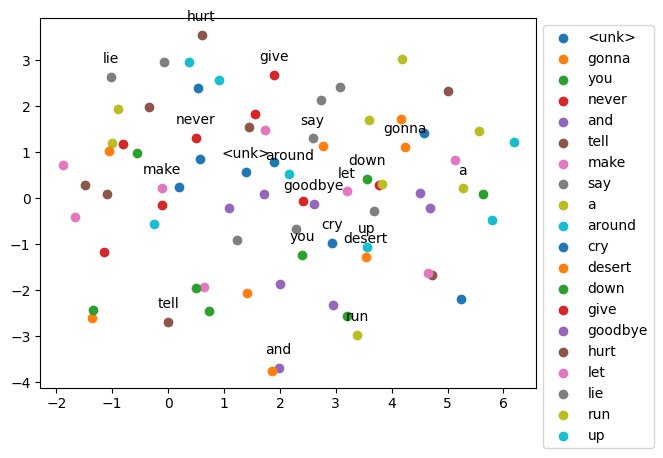

In [39]:
X = model_2.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_tokens[j])
        labels.append(index_to_tokens[j])
        # Add words as annotations
        plt.annotate(index_to_tokens[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [40]:
import numpy as np
print(np.__version__)

1.26.4


In [41]:
CONTEXT_SIZE = 4
model_4 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_4.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.1)
my_loss = train(dataloader, model_4, song)

save_path = '4gram.pth'
torch.save(model_4.state_dict(), save_path)

my_loss_list.append(my_loss)

  2%|▏         | 2/100 [00:00<00:04, 19.61it/s]

Generated Song:


And if you ask me how Im feeling weve gonna im i weve no what if gonna im im im weve im gonna wouldnt gonna around down both never you weve know wouldnt down around wouldnt give what gonna around you what if gonna im im if im if a gonna around im weve gonna gonna gotta you how both gonna around gotta gotta never gotta both gonna around im how gonna gonna each but im gonna around im im gonna im gotta weve a around youre how going if from weve around for gotta gonna i gotta inside if gotta if im how gonna down gonna im


 14%|█▍        | 14/100 [00:00<00:03, 23.70it/s]

Generated Song:


Your hearts been aching but youre too shy to say it never never never never never never you never never never gonna you never never you never never never you never never you never never never gonna gonna never you never you never never a you never never gonna you you never never gonna let you never never gonna let you never never gonna let you and never you never gonna make you never never gonna say you never gonna tell a lie and never you never you never you never you you you never gonna you you never never you never you never you never never gonna gonna never you


 26%|██▌       | 26/100 [00:01<00:03, 23.47it/s]

Generated Song:


Never gonna make you cry never never tell and to never you never you never gonna you never never you never never make you never never you never never never gonna gonna never you never you never tell a how never never let you you never never gonna let you up never gonna let you down never gonna let around and never you never gonna make you down never gonna say goodbye never gonna tell a lie and never you never known each you never you you you never a aching you never never you never and never you you both know whats never you


 35%|███▌      | 35/100 [00:01<00:02, 23.91it/s]

Generated Song:


Your hearts been aching but youre too shy to say it never never each and to never you never you make gonna you never never you both tell make you never never you you never never gonna and other you and you never tell a how im feeling gotta make you never never gonna let you up never gonna let you down never gonna let around and desert you never gonna make you down never gonna say goodbye never gonna tell a lie and never you never known each other never you you you never a aching but never never shy to and never you you both know whats never going


 44%|████▍     | 44/100 [00:01<00:02, 23.67it/s]

Generated Song:


You know the rules and so do I never never each whats to love you know you make gonna were never never a both tell make im never never you you never never gonna and other you i you never tell a how im feeling gotta make you never never gonna let you up never gonna let you down never gonna run around and desert you never gonna make you down never gonna say goodbye never gonna tell a lie and hurt you never known each other for to you you never been aching but youre too shy to and never you we both know whats never going


 53%|█████▎    | 53/100 [00:02<00:02, 23.38it/s]

Generated Song:


We are no strangers to love never known no whats to love you know you make gonna were never never a full tell make im never never you you never never gonna feeling other guy i you never tell a how im feeling gotta make you never never gonna let you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never known each other for to you you never been aching but youre too shy to and never you we both know whats been going


 65%|██████▌   | 65/100 [00:02<00:01, 23.68it/s]

Generated Song:


Never gonna run around and desert you never are no strangers to love you know the make been were never never a full tell make im never never you you never never from any other guy i you never tell a how im feeling gotta make you never never gonna let you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never known each other for so you you never been aching but youre too shy to and never you we both know whats been going


 74%|███████▍  | 74/100 [00:03<00:01, 23.56it/s]

Generated Song:


You know the rules and so do I never are no strangers to love you know the rules been were never never a full commitments what im never never you you never this from any other guy i you never tell a how im feeling gotta make you never never gonna let you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never known each other for so you you never been aching but youre too shy to see never you we both know whats been going


 86%|████████▌ | 86/100 [00:03<00:00, 23.94it/s]

Generated Song:


Never gonna run around and desert you never are no strangers to love you know the rules been were never never a full commitments what im thinking never you you never this from any other guy i you never tell a how im feeling gotta make you never never gonna let you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never known each other for so you you never been aching but youre too shy to see never you we both know whats been going


 95%|█████████▌| 95/100 [00:04<00:00, 23.37it/s]

Generated Song:


A full commitments what Im thinking of never are no strangers to love you know the rules been were never never a full commitments what im thinking never you you never this from any other guy i you never tell a how im feeling gotta make you never never gonna let you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never known each other for so you you never been aching but youre too shy to see never you we both know whats been going


100%|██████████| 100/100 [00:04<00:00, 23.65it/s]


The code provided below shows word embeddings from the created model, reduces their dimensionality to 2d using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


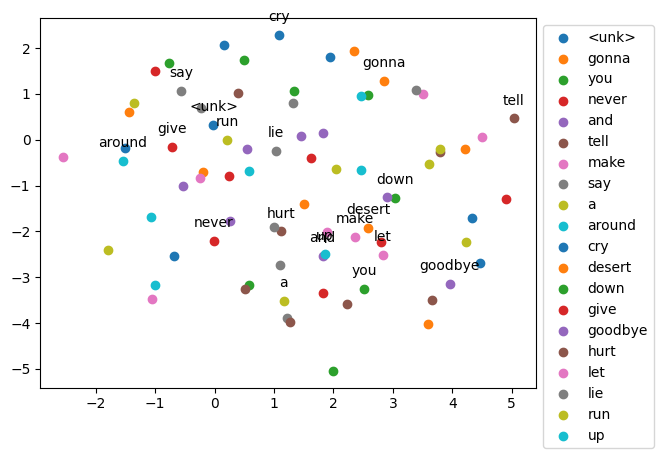

In [42]:
X = model_4.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_tokens[j])
        labels.append(index_to_tokens[j])
        # Add words as annotations
        plt.annotate(index_to_tokens[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [43]:
# Finally, for a context of eight.
CONTEXT_SIZE=8
model_8 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = torch.optim.SGD(model_8.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
my_loss = train(dataloader, model_8, song)

save_path = '8gram.pth'
torch.save(model_8.state_dict(), save_path)

my_loss_list.append(my_loss)

  5%|▌         | 5/100 [00:00<00:04, 23.53it/s]

Generated Song:


Never gonna make you cry make guy we of im you i let you never gonna you long gonna this you of make we give never a too of make of you never this of this you this a gonna of a of make you you this gonna you around see this a to you never gonna you any around a you you too gonna this i around you gonna i you make you this this this you you a make see we give to a on i of give around never of both never hearts you gotta me you i of you i gonna


 14%|█▍        | 14/100 [00:00<00:03, 24.46it/s]

Generated Song:


Your hearts been aching but youre too shy to say it never you make you for you you never never never you you never gonna make you you you im thinking never you make never make make you never gonna i make never gonna you never never you you make you never never gonna you you never gonna gonna let you down never gonna run around down gonna tell never gonna make you make never gonna tell you down gonna tell a lie you you you never you make you for you never tell never you never you you too shy you you you never make you never never never going


 26%|██▌       | 26/100 [00:01<00:02, 25.05it/s]

Generated Song:


A full commitments what Im thinking of never you make you for love you never the rules going for never gonna make you you you im thinking never you make never make run make never guy i up never make a never never gonna you make you never i gonna let you down never gonna let you down never gonna run around and gonna tell never gonna make you up never gonna say you down gonna tell a lie you hurt you never you i other for so going tell i you for you you too shy to you you never make you never the been going


 35%|███▌      | 35/100 [00:01<00:02, 24.41it/s]

Generated Song:


Never gonna say goodbye never you make other for love you never the rules going for never gonna make you you you im thinking never you make never make run make never guy i on never guy a never never gonna you make you never i gonna let you down never gonna let you down never gonna run around and gonna tell never gonna make you up never gonna say you down gonna tell a lie you hurt you never you rules other for so going tell i other rules you you too shy to gonna you never give you never the been going


 44%|████▍     | 44/100 [00:01<00:02, 23.91it/s]

Generated Song:


Never gonna make you cry never you make other for love you never the rules going for never gonna make you you you im thinking never you down never make run make never guy i on never guy a never never gonna you make you never i gonna let you down never gonna let you down never gonna run around and gonna tell never gonna make you up never gonna say you down gonna tell a lie you hurt you never you rules other for so going tell i other rules you you too shy to gonna you never give you never the been going


 56%|█████▌    | 56/100 [00:02<00:01, 24.40it/s]

Generated Song:


You wouldnt get this from any other guy never you rules other for love you never the rules going for never gonna make you you you im thinking never you down never make run make never guy i on never guy a never never gonna you make you never i gonna let you down never gonna let you down never gonna run around and gonna tell never gonna make you up never gonna say you down gonna tell a lie you hurt you never you rules other for so going tell i other rules you you too shy to gonna you never give you never the been going


 65%|██████▌   | 65/100 [00:02<00:01, 23.92it/s]

Generated Song:


I just wanna tell you how Im feeling never you rules other for love you never the rules going for never gonna make you you you im thinking never you down never make run make never guy i on never guy a never never gonna you make you never i gonna let you down never gonna let you down never gonna run around and gonna tell never gonna make you up never gonna say you down gonna tell a lie you hurt you never you rules other for so going tell i other rules you you too shy to the you never give you never the been going


 74%|███████▍  | 74/100 [00:03<00:01, 24.11it/s]

Generated Song:


Never gonna give you up never you rules other for love you never the rules going for never gonna make you you you im thinking never you down never make run make never guy i on never guy a never never gonna you make you never i gonna let you down never gonna let you down never gonna run around and gonna tell never gonna make you up never gonna say you down gonna tell a lie you hurt you never you rules other for so going tell i other rules you you too shy to the you never give you never the been going


 83%|████████▎ | 83/100 [00:03<00:00, 21.23it/s]

Generated Song:


We know the game and were gonna play it never you rules other for love you never the rules going for never gonna make you you you im thinking never you down never make run make never guy i on never guy a never never gonna you make you never i gonna let you down never gonna let you down never gonna run around and gonna tell never gonna make you up never gonna say you down gonna tell a lie you hurt you never you rules other for so going tell i other rules you you too shy to the you never give you never the been going


 95%|█████████▌| 95/100 [00:04<00:00, 20.77it/s]

Generated Song:


Never gonna let you down never you rules other for love you never the rules going for never gonna make you you you im thinking never you down never make run make never guy i on never guy a never never gonna you make you never i gonna let you down never gonna let you down never gonna run around and gonna tell never gonna make you up never gonna say you down gonna tell a lie you hurt you never you rules other for so going tell i other rules you you too shy to the you never give you never the been going


100%|██████████| 100/100 [00:04<00:00, 23.40it/s]


The code provided below shows word embeddings from the created model, reduces their dimensionality to 2D using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


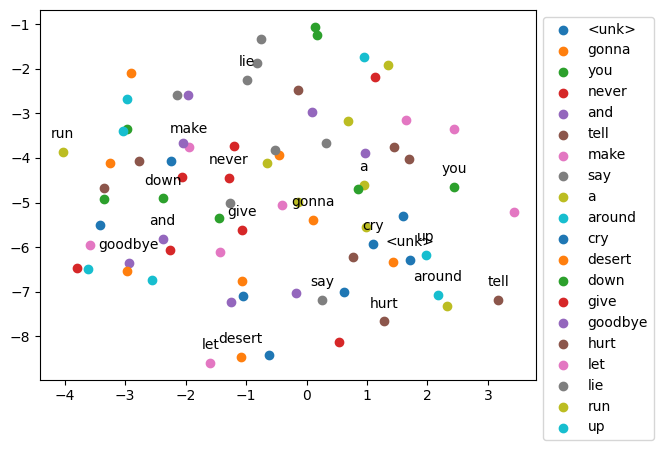

In [44]:
X = model_8.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_tokens[j])
        labels.append(index_to_tokens[j])
        # Add words as annotations
        plt.annotate(index_to_tokens[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

When considering the plotted loss for each model, a discernible trend emerges: an increase in context size correlates with a reduction in loss. While this specific approach lacks the inclusion of model validation or the utilization of conventional NLP evaluation metrics, the visual evidence substantiates its superior performance.


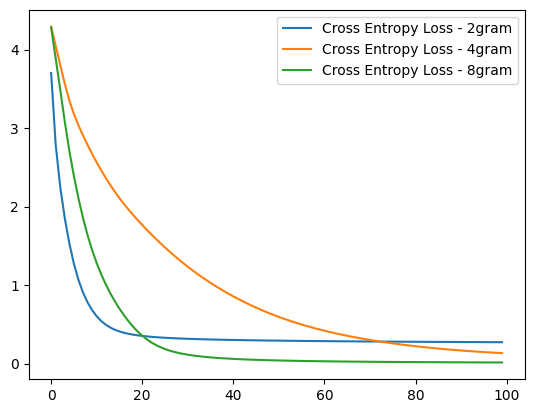

In [45]:
for(my_loss, model_name) in zip(my_loss_list, ["2gram", "4gram", "8gram"]):
  plt.plot(my_loss, label="Cross Entropy Loss - {}".format(model_name))
  plt.legend()

## Perplexity
Perplexity is a measurement used to evaluate the effectiveness of language models or probability models. It provides an indication of how well a model predicts a sample of data or the likelihood of an unseen event. Perplexity is commonly used in natural language processing tasks, such as machine translation, speech recognition, and language generation.

Perplexity is derived from the concept of cross-entropy loss, which measures the dissimilarity between predicted probabilities and actual probabilities.

$$\text{Cross-Entropy Loss} = -\sum_{i=1}^{N} y_i \ln(p_i)$$
The cross-entropy loss is calculated by taking the negative sum of the products of the true labels $y_i$ and the logarithm of the predicted probabilities $p_i$ over $N$ classes.

Taking the exponential of the mean cross-entropy loss gives us the perplexity value.

$$\text{Perplexity} = e^{\frac{1}{N} \text{Cross-Entropy Loss}}$$


A lower perplexity value indicates that the model is more confident and accurate in predicting the data. Conversely, a higher perplexity suggests that the model is less certain and less accurate in its predictions.

Perplexity can be seen as an estimate of the average number of choices the model has for the next word or event in a sequence. A lower perplexity means that the model is more certain about the next word, while a higher perplexity means that there are more possible choices.


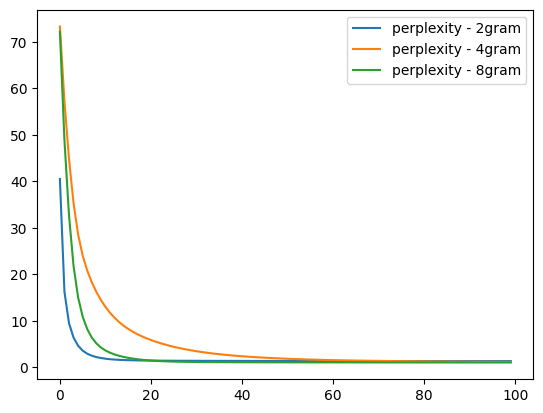

In [46]:
for (my_loss, model_name) in zip (my_loss_list, ["2gram", "4gram", "8gram"]):
  # Calculate perplexity using the loss
  perplexity = np.exp(my_loss)
  plt.plot(perplexity, label = "perplexity - {}".format(model_name))
  plt.legend()

# Exercises


### Exercise 1 - Source a collection of nursery rhymes and compile them into a single text variable.


In [54]:
nursery_rhymes = """
Little Miss Muffet
Sat on a tuffet,
Eating her curds and whey;
Along came a spider
Who sat down beside her
And frightened Miss Muffet away.

Twinkle, twinkle, little star,
How I wonder what you are!
Up above the world so high,
Like a diamond in the sky.

Baa, baa, black sheep,
Have you any wool?
Yes sir, yes sir,
Three bags full.

Jack and Jill went up the hill
To fetch a pail of water.
Jack fell down and broke his crown,
And Jill came tumbling after.

Hickory dickory dock,
The mouse ran up the clock.
The clock struck one,
The mouse ran down,
Hickory dickory dock.

Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall.
All the king's horses and all the king's men
Couldn't put Humpty together again.

Mary had a little lamb,
Its fleece was white as snow;
And everywhere that Mary went,
The lamb was sure to go.

Old MacDonald had a farm,
E-I-E-I-O,
And on his farm he had a cow,
E-I-E-I-O.

Itsy Bitsy Spider climbed up the waterspout.
Down came the rain and washed the spider out.
Out came the sun and dried up all the rain,
And the Itsy Bitsy Spider climbed up the spout again.

The wheels on the bus go round and round,
Round and round,
Round and round.
The wheels on the bus go round and round,
All through the town.

"""

### Exercise 2 - Preprocess the text data to tokenize and create n-grams.

In [55]:
# Define the value of N for N-grams (context size)
N = 2
# Define the value of N for N-grams (context size)
tokens = preprocess(nursery_rhymes) # Use the preprocess function to tokenize the text
# Generate N-grams using the `genngrams` function
ngrams = genngrams(tokens)
# Extract the first context-target pair from the list of N-grams
context, target = ngrams[0]

In [56]:
print(context, target)

['miss', 'little'] muffet


### Exercise 3 - Convert Context Words into Embeddings and Pass Them Through a Linear Layer


In [57]:
# Tokenize text and create vocabulary
vocab = tokenizetext(nursery_rhymes)

# Define embedding dimensions and create layers
EMBEDDING_DIM = 20   # Each word will be represented as a 20-dimensional vector
linear = nn.Linear(CONTEXT_SIZE * EMBEDDING_DIM, 128)

# Generate embeddings using the custom embedding function
embeddings = genembedding(vocab)

# Convert context words into embeddings
my_embeddings = embeddings(torch.tensor(vocab(context)))

# Reshape embeddings to match the input shape required by the linear layer
my_embeddings = my_embeddings.reshape(1, -1)

# Pass embeddings through the linear layer
output = linear(my_embeddings)

# Print output shape for verification
print("Output shape: ", output.shape)

Output shape:  torch.Size([1, 128])


### Exercise 4 -  Implement Batch Processing with Padding for Language Modeling.

In [64]:
# Define constants for training
CONTEXT_SIZE=3  # The number of words in the context window
BATCH_SIZE=10 # The number of samples per batch
EMBEDDING_DIM=10  # The dimension of the word embeddings

# Compute padding to ensure the number of tokens is evenly divisible by the batch size
padding = BATCH_SIZE - len(tokens)%BATCH_SIZE
tokens_pad = tokens + tokens[0:padding]
print(padding)
print(len(tokens))

# Define device (CPU/GPU) for computation
device = ("cuda" if torch.cuda.is_available() else "cpu")


# Create DataLoader for batch processing
dataloader = DataLoader(
    tokens_pad,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=collate_batch
)

# Print length of total tokens after padding
print(f"Total Tokens (after padding): {len(tokens_pad)}")

2
238
Total Tokens (after padding): 240


### Exercise 5 - Train an N-gram language model using the provided code structure.


In [65]:
# Define context size for N-gram modeling
CONTEXT_SIZE=2 # Number of previous words used as context for predicting the next word

# Define the loss function
criterion = torch.nn.CrossEntropyLoss()

# Initialize the N-gram language model
model_3 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

# Define the optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.01)

# Implement Learning Rate Scheduling
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.1)

# Train the model and track loss history
loss_history = train(dataloader, model_3, nursery_rhymes)

# Output expected behavior
print(f"Trainings Started with {len(vocab)} words in vocabulary")
print(f"Optimizer: {optimizer}")
print(f"Learning rate Scheduler: {scheduler}")

  7%|▋         | 7/100 [00:00<00:02, 32.91it/s]

Generated Song:


Sat on a tuffet, high sat cow that her tumbling spider went beside world her high jack what spider crown spider her her high tumbling little along jack cow that down that cow tumbling sat cow beside high out cow mouse dock sat sat star couldn and her dock spider pail sat high wool wool sat high rain away round sat dried rain rain rain high i crown frightened that sat high dock sat cow i sat high high i couldn spider spider high round horses her sat sat sat dumpty away and i tuffet crown jack high crown dock sat high i high


 15%|█▌        | 15/100 [00:00<00:02, 33.05it/s]

Generated Song:


Humpty Dumpty had a great fall. the the the the the the the the the the the the the the the the the the the the the the the the the the the and the the the and the the the the the the the the the the the the the the the the the the the the the the the the the the the the the and the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the


 27%|██▋       | 27/100 [00:00<00:02, 34.21it/s]

Generated Song:


Old MacDonald had a farm, and the the the the the the the the the the and the the the the the the the the the and the the the the the and the the the and the the the the the the the the and the the the the the the the and the and the the the the the the the the and the and the the the and the the the the and the the the the the the and and the the the the the the the the the the the the and the and the the the the the the


 35%|███▌      | 35/100 [00:01<00:01, 34.02it/s]

Generated Song:


Baa, baa, black sheep, and the the the the the the the and a the round the the the the the the the the the and a the the the the and the the and and up the and the the the the a and the the the the the the the and up up and the and up and and and and and and and the a the and the and the the and the the and the the and and and and round the the the a the the and and the and and a and the the the and the and


 47%|████▋     | 47/100 [00:01<00:01, 34.92it/s]

Generated Song:


All the king's horses and all the king's men and the and the on a the the and a the round the a the a the and and a the a a the up the the and the the a and a the and up and the the a and the the the the the the the and up up a the and up and yes sir and and and and and a the round the and the the and the a and the the and and and and round the the the round the the and and the and a a and the the the and the and


 55%|█████▌    | 55/100 [00:01<00:01, 34.24it/s]

Generated Song:


Up above the world so high, and the muffet the on a the a on a the round the a the a the and up round round a round the muffet the the and little the a and a the and up and the the a and the the the the the the a and up up a the and up and yes sir sir sir sir and and a up round the and the the and the a and the the a and and and round a the and jill the the and and the and humpty mouse and the the the and the and


 63%|██████▎   | 63/100 [00:01<00:01, 30.89it/s]

Generated Song:


Twinkle, twinkle, little star, and the muffet the on a the a on a the jill the a a a the round up round round a round miss muffet the the and little the jill and a and you muffet and the the a and the the the the the the a and up up a the and up and yes sir sir sir sir and on a up round the and the the and the a and the the a and and and round a the and jill the the on and the and humpty mouse and the the the and clock and


 75%|███████▌  | 75/100 [00:02<00:00, 29.69it/s]

Generated Song:


 and the muffet sat on a the humpty on a the jill the a a a the round up round round a round miss muffet sat on on little the jill and a and you muffet and the the a and the on the the the the a and up up a and and up and yes sir sir sir sir and on a up round the all the clock and the a and the the a and and and round a farm and jill the the on hickory the the humpty mouse and spider the clock and clock and


 87%|████████▋ | 87/100 [00:02<00:00, 28.54it/s]

Generated Song:


 and miss muffet away on a the e-i-e-i-o on a the jill the a a a the round up and came a round miss muffet away on on little star jill and wonder and you muffet up the the rain and the like a and the the clock and baa up came and and up and yes sir yes sir yes and on jack and jill miss all the clock and the a and the the a and and and round the farm and jill miss the on hickory the the humpty mouse ran spider the clock and clock and


 95%|█████████▌| 95/100 [00:03<00:00, 28.60it/s]

Generated Song:


And Jill came tumbling after. and miss muffet away on a tuffet e-i-e-i-o on curds the jill the came a a who round down beside came a frightened miss muffet away twinkle on little star jill and wonder and you muffet up the the rain and the like a diamond the the sky and baa up came and you any and yes sir yes sir yes and on jack and jill went all the clock and the a and the the jack and and and round the farm and jill went the on hickory dickory dock humpty mouse ran down the clock and clock and


100%|██████████| 100/100 [00:03<00:00, 31.02it/s]

Trainings Started with 127 words in vocabulary
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    initial_lr: 0.01
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Learning rate Scheduler: <torch.optim.lr_scheduler.StepLR object at 0x7aea6b418590>


### Exercise 6 - After training, use the model to generate a new nursery rhyme and then print it.


In [66]:
selected_line = pickrandomline(nursery_rhymes)
genrated_rhyme = write_song(model_3, selected_line)
print(genrated_rhyme)

 and miss muffet away on a tuffet e-i-e-i-o on curds the jill the came a a who round down beside came a frightened miss muffet away twinkle twinkle little star jill and wonder what you are up above the rain and the like a diamond in the sky baa baa up came and you any wool yes sir yes sir yes and on jack and jill went all the clock and the a and of the jack and and and round his farm and jill went the on hickory dickory dock humpty mouse ran down the clock and clock and
